In [1]:
library(tidyverse) # metapackage of all tidyverse packages

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data voor project

In [2]:
leagues = read.csv("https://raw.githubusercontent.com/lucasweyrich958/EURO2024_Simulation/main/Leagues.csv")
nations = read.csv("https://raw.githubusercontent.com/lucasweyrich958/EURO2024_Simulation/main/Nations.csv")
team_data_scrape = read.csv("https://raw.githubusercontent.com/lucasweyrich958/EURO2024_Simulation/main/Team_scrape.csv") 
player_data_scrape = read.csv('https://raw.githubusercontent.com/lucasweyrich958/EURO2024_Simulation/main/player_stats_data.csv')
player_id_scrape = read.csv('https://raw.githubusercontent.com/lucasweyrich958/EURO2024_Simulation/main/player_id_data.csv')
results=read.csv ('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
goals=read.csv ('/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv')
shootouts=read.csv ('/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv')
fifa_rank=read.csv ('/kaggle/input/fifaworldranking/fifa_ranking-2024-04-04.csv')
head(leagues)
head (nations)
head (player_data_scrape)
head (team_data_scrape)
head (fifa_rank)


,League,ID,Season
,<chr>,<int>,<int>
1,World Cup,1,2010
2,World Cup,1,2014
3,World Cup,1,2018
4,World Cup,1,2022
5,Euro Championship,4,2008
6,Euro Championship,4,2012


,Nation,Group,ID,FIFA_Rank
,<chr>,<chr>,<int>,<int>
1,Germany,A,25,16
2,Scotland,A,1108,39
3,Hungary,A,769,26
4,Switzerland,A,15,19
5,Spain,B,9,8
6,Croatia,B,3,10


,X,id,name,birthdate,height,weight,season,rating,minutes,total_shots,⋯,tackles,total_duels,won_duels,total_dribbles,won_dribbles,fouls_drawn,fouls_comitted,yellow,red,yellowred
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,27736,Ricardo Gabriel Canales Lanza,1982-05-30,181 cm,78 kg,2010,NA,312,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2,35806,Francisco Javier Rodríguez Pinedo,1981-10-20,191 cm,80 kg,2010,NA,3136,0,⋯,0,0,0,0,0,0,0,9,1,1
3,3,100768,Dominic Adiyiah,1989-11-29,172 cm,70 kg,2010,NA,1079,0,⋯,0,0,0,0,0,0,0,3,0,0
4,4,104275,Nam-Chol Pak,1988-10-03,183 cm,78 kg,2010,NA,472,0,⋯,0,0,0,0,0,0,0,0,0,0
5,5,104297,Jun-Il Ri,1987-08-24,178 cm,66 kg,2010,NA,2483,0,⋯,0,0,0,0,0,0,0,0,0,0
6,6,104375,Chol-Hyok An,1987-06-27,178 cm,72 kg,2010,NA,504,0,⋯,0,0,0,0,0,0,0,2,0,0


,X,id,name,logo,output.form,output.league.season,played.home,played.away,played.total,wins.home,⋯,draws.total,loses.home,loses.away,loses.total,home,away,total,home.1,away.1,total.1
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,25,Germany,https://media.api-sports.io/football/teams/25.png,WLWWWLW,2010,4,3,7,2,⋯,0,2,0,2,8,8,16,3,2,5
2,2,15,Switzerland,https://media.api-sports.io/football/teams/15.png,WLD,2010,1,2,3,0,⋯,1,0,1,1,0,1,1,0,1,1
3,3,9,Spain,https://media.api-sports.io/football/teams/9.png,LWWWWWW,2010,3,4,7,2,⋯,0,1,0,1,3,5,8,1,1,2
4,4,768,Italy,https://media.api-sports.io/football/teams/768.png,DDL,2010,2,1,3,0,⋯,2,0,1,1,2,2,4,2,3,5
5,5,1091,Slovenia,https://media.api-sports.io/football/teams/1091.png,WDL,2010,2,1,3,0,⋯,1,1,0,1,2,1,3,3,0,3
6,6,21,Denmark,https://media.api-sports.io/football/teams/21.png,LWL,2010,1,2,3,0,⋯,0,1,1,2,1,2,3,3,3,6


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,83,Guatemala,GUA,15,0,83,CONCACAF,1992-12-31
2,32,Zambia,ZAM,38,0,32,CAF,1992-12-31
3,33,Portugal,POR,38,0,33,UEFA,1992-12-31
4,34,Austria,AUT,38,0,34,UEFA,1992-12-31
5,35,Colombia,COL,36,0,35,CONMEBOL,1992-12-31
6,36,Hungary,HUN,36,0,36,UEFA,1992-12-31


In [3]:
fifa_rank$rank_date=as.Date(fifa_rank$rank_date, format = "%Y-%m-%d")
fifa_rank=fifa_rank[order(fifa_rank$country_full, fifa_rank$rank_date),]
fifa_rank=fifa_rank %>%
  group_by(country_full) %>%
  mutate(lag_rank_date = lag(rank_date, n=1, order_by=country_full))

In [4]:
Rank_Netherlands=subset (fifa_rank, country_full=="Netherlands", select=c(rank,  lag_rank_date, rank_date))
Rank_overig=subset (fifa_rank, country_full!="Netherlands", select=c(country_full, rank,  lag_rank_date, rank_date))


Dataset maken

In [5]:
Netherlands=subset (results, (home_team=="Netherlands" | away_team=="Netherlands") & home_score >=0)

Netherlands$date= as.Date(Netherlands$date, format = "%Y-%m-%d")
Netherlands$goals_voor= with(Netherlands, ifelse (home_team=="Netherlands", Netherlands$home_score,
                            ifelse (away_team=="Netherlands", Netherlands$away_score, 0)))
Netherlands$goals_tegen= with(Netherlands, ifelse (home_team=="Netherlands", Netherlands$away_score,
                            ifelse (away_team=="Netherlands", Netherlands$home_score, 0))) 
Netherlands$winst= with(Netherlands, ifelse (goals_voor>goals_tegen, 'W',
                            ifelse (goals_voor<goals_tegen, 'L', 'D'))) 
Netherlands$winst_num= with(Netherlands, ifelse (goals_voor>goals_tegen, 3,
                            ifelse (goals_voor<goals_tegen, 0, 1))) 
Netherlands$locatie= with(Netherlands, ifelse (country=='Netherlands', 'Thuis',
                            ifelse (country!="Netherlands" & neutral=="FALSE", 'Uit', 'Neutraal')))
Netherlands$tegenstander= with(Netherlands, ifelse (home_team=="Netherlands", Netherlands$away_team,
                            ifelse (away_team=="Netherlands", Netherlands$home_team, 0)))

library(plyr)
library(zoo)
Netherlands$goal_voor10mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$goals_voor,10,align = x, na.pad = TRUE))
Netherlands$goal_voor5mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$goals_voor,5,align = x, na.pad = TRUE))
Netherlands$goal_tegen10mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$goals_tegen,10,align = x, na.pad = TRUE))
Netherlands$goal_tegen5mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$goals_tegen,5,align = x, na.pad = TRUE))
Netherlands$punten10mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$winst_num,10,align = x, na.pad = TRUE))
Netherlands$punten5mean <- sapply(c("right"),
                function(x)zoo::rollmean(Netherlands$winst_num,5,align = x, na.pad = TRUE))
Netherlands=ddply(
  Netherlands, "tegenstander",
  transform,
  score5meanvoor_per_tegenstander = rollmean(goals_voor, 5, align="right", na.pad=TRUE ),
  score5meantegen_per_tegenstander = rollmean(goals_tegen, 5, align="right", na.pad=TRUE ),
winst5mean_per_tegenstander = rollmean(winst_num, 5, align="right", na.pad=TRUE ))
Netherlands=ddply(
  Netherlands,  "tournament",
  transform,
  score5meanvoor_per_tournament = rollmean(goals_voor, 5, align="right", na.pad=TRUE ),
  score5meantegen_per_tournament = rollmean(goals_tegen, 5, align="right", na.pad=TRUE ),
winst5mean_per_tournament = rollmean(winst_num, 5, align="right", na.pad=TRUE ))
                                   

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Koppelen met fifa gegevens

In [6]:
library (dplyr)
stap_1=Netherlands %>%left_join(Rank_Netherlands, join_by(date >= lag_rank_date , date<rank_date ))
stap_1=subset(stap_1, select =-c(lag_rank_date,rank_date))
stap_2=stap_1 %>%left_join(Rank_overig, join_by(tegenstander==country_full,date >= lag_rank_date , date<rank_date ))
stap_2=subset(stap_2, select =-c(lag_rank_date,rank_date))
names(stap_2)[names(stap_2) == "rank.x"] <- "Rang_NL_FIFA"
names(stap_2)[names(stap_2) == "rank.y"] <- "Rang_Teg_FIFA"
stap_2$FIFA_Rang_verschil=stap_2$Rang_Teg_FIFA-stap_2$Rang_NL_FIFA #+ is slechter - is beter


In [7]:
str (stap_2)

'data.frame':	843 obs. of  30 variables:
 $ date                            : Date, format: "2011-06-08" "1979-05-22" ...
 $ home_team                       : chr  "Uruguay" "Argentina" "Netherlands" "Argentina" ...
 $ away_team                       : chr  "Netherlands" "Netherlands" "Argentina" "Netherlands" ...
 $ home_score                      : int  1 0 4 3 2 0 0 2 2 1 ...
 $ away_score                      : int  1 0 0 1 1 0 0 2 3 5 ...
 $ tournament                      : chr  "Copa Confraternidad" "FIFA 75th Anniversary Cup" "FIFA World Cup" "FIFA World Cup" ...
 $ city                            : chr  "Montevideo" "Berne" "Gelsenkirchen" "Buenos Aires" ...
 $ country                         : chr  "Uruguay" "Switzerland" "Germany" "Argentina" ...
 $ neutral                         : logi  FALSE TRUE TRUE FALSE TRUE TRUE ...
 $ goals_voor                      : num  1 0 4 1 2 0 0 2 3 5 ...
 $ goals_tegen                     : num  1 0 0 3 1 0 0 2 2 1 ...
 $ winst             

Laggen van variabelen anders voorspel je het zelf

In [8]:
stap_2=stap_2[order(stap_2$date, decreasing = FALSE), ]
# Toevoegen lag variabelen
stap_2$lag_goal_voor10mean=lag (stap_2$goal_voor10mean )
stap_2$lag_goal_voor5mean=lag (stap_2$goal_voor5mean )
stap_2$lag_goal_tegen10mean=lag (stap_2$goal_tegen10mean )
stap_2$lag_goal_tegen5mean=lag (stap_2$goal_tegen5mean )
stap_2$lag_punten10mean=lag (stap_2$punten10mean )
stap_2$lag_punten5mean=lag (stap_2$punten5mean )
stap_2$lag_score5meanvoor_per_tegenstander=lag (stap_2$score5meanvoor_per_tegenstander )
stap_2$lag_score5meantegen_per_tegenstander=lag (stap_2$score5meantegen_per_tegenstander )
stap_2$lag_score5meanvoor_per_tournament =lag (stap_2$score5meanvoor_per_tournament )
stap_2$lag_winst5mean_per_tournament =lag (stap_2$winst5mean_per_tournament)



In [9]:
str(stap_2)

'data.frame':	843 obs. of  40 variables:
 $ date                                : Date, format: "1905-04-30" "1905-05-14" ...
 $ home_team                           : chr  "Belgium" "Netherlands" "Belgium" "Netherlands" ...
 $ away_team                           : chr  "Netherlands" "Belgium" "Netherlands" "Belgium" ...
 $ home_score                          : int  1 4 5 2 1 1 1 3 4 5 ...
 $ away_score                          : int  4 0 0 3 3 2 4 1 1 3 ...
 $ tournament                          : chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city                                : chr  "Antwerp" "Rotterdam" "Antwerp" "Rotterdam" ...
 $ country                             : chr  "Belgium" "Netherlands" "Belgium" "Netherlands" ...
 $ neutral                             : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ goals_voor                          : num  4 4 0 2 3 1 4 3 4 5 ...
 $ goals_tegen                         : num  1 0 5 3 1 2 1 1 1 3 ...
 $ winst                 

In [10]:
Analysebestand=subset (stap_2, date> as.Date("2000-01-01"), select=-c(goal_voor10mean, goal_voor5mean,
goal_tegen10mean, goal_tegen5mean, punten10mean, punten5mean,score5meanvoor_per_tegenstander, score5meantegen_per_tegenstander,
winst5mean_per_tegenstander, score5meanvoor_per_tournament, score5meantegen_per_tournament, winst5mean_per_tournament))

In [11]:
str (Analysebestand)

'data.frame':	292 obs. of  28 variables:
 $ date                                : Date, format: "2000-02-23" "2000-03-29" ...
 $ home_team                           : chr  "Netherlands" "Belgium" "Netherlands" "Netherlands" ...
 $ away_team                           : chr  "Germany" "Netherlands" "Scotland" "Romania" ...
 $ home_score                          : int  2 2 0 2 3 1 3 3 6 0 ...
 $ away_score                          : int  1 2 0 1 1 0 0 2 1 0 ...
 $ tournament                          : chr  "Friendly" "Friendly" "Friendly" "Friendly" ...
 $ city                                : chr  "Amsterdam" "Brussels" "Arnhem" "Amsterdam" ...
 $ country                             : chr  "Netherlands" "Belgium" "Netherlands" "Netherlands" ...
 $ neutral                             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ goals_voor                          : num  2 2 0 2 3 1 3 3 6 0 ...
 $ goals_tegen                         : num  1 2 0 1 1 0 0 2 1 0 ...
 $ winst             

In [12]:
library(Metrics)
library(randomForestExplainer)
library(randomForest)
library(tidyr)
library(caret)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [13]:
model_df = subset(Analysebestand, select = -c(date, home_team, away_team, home_score, away_score, city, winst_num, goals_tegen, goals_voor)) #Create model df by subtracting unneeded columns
model_df[is.na(model_df)] = 0 #Replace NaNs with 0, because in this case it is bad if a team has NaN
set.seed(2024) #Seed for reproducibility

train_ind = createDataPartition(model_df$winst, p = 0.8, list = FALSE) #Create an index for split
train = model_df[train_ind, ] #Create training set by applying row index
test = model_df[-train_ind, ] #Create test set by subtracting row index

model = randomForest(as.factor (winst) ~ ., 
                      data = train, ntree = 180, mtry = 5) #Fit a random forest model with 150 trees

print(model)


Call:
 randomForest(formula = as.factor(winst) ~ ., data = train, ntree = 180,      mtry = 5) 
               Type of random forest: classification
                     Number of trees: 180
No. of variables tried at each split: 5

        OOB estimate of  error rate: 41.7%
Confusion matrix:
   D L   W class.error
D  8 6  37   0.8431373
L  5 8  28   0.8048780
W 14 8 121   0.1538462


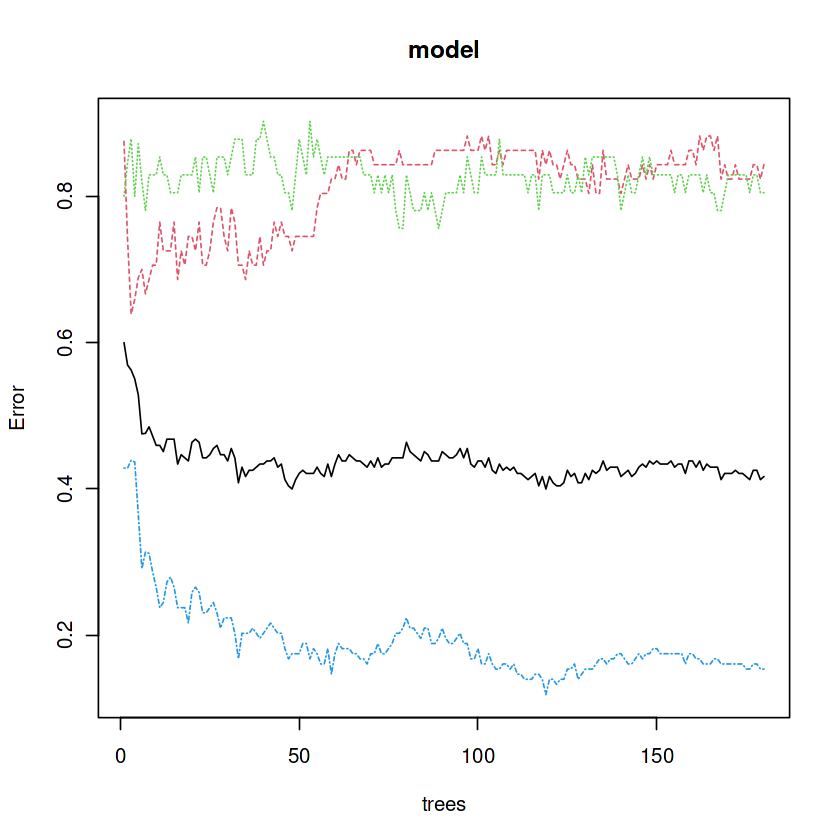

In [14]:
plot (model)

Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”


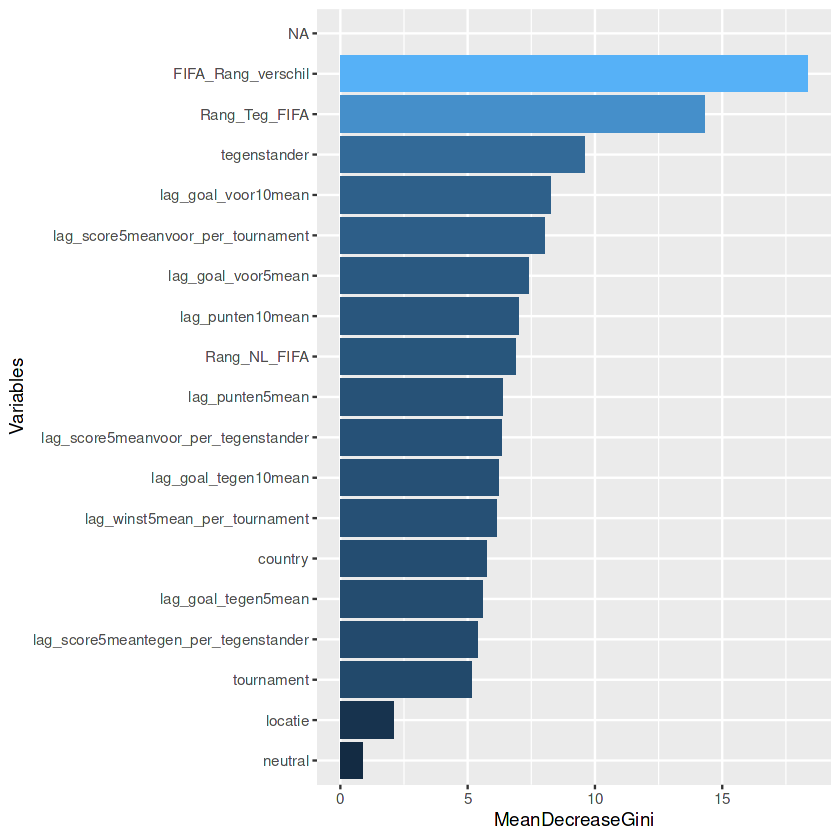

In [15]:
imp_RF <- importance(model)
imp_DF <- data.frame(Variables = row.names(imp_RF), MSE = imp_RF[,1])
imp_DF <- imp_DF[order(imp_DF$MSE, decreasing = TRUE),]

ggplot(imp_DF[1:20,], aes(x=reorder(Variables, MSE), y=MSE, fill=MSE)) + geom_bar(stat = 'identity') + labs(x = 'Variables', y= 'MeanDecreaseGini') + coord_flip() + theme(legend.position="none")